In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

# Data

In [5]:
# Read data
motion_01 = np.genfromtxt('./motion_01.csv', delimiter=',')
motion_02 = np.genfromtxt('./motion_02.csv', delimiter=',')
motion_03 = np.genfromtxt('./motion_03.csv', delimiter=',')
motion_04 = np.genfromtxt('./motion_04.csv', delimiter=',')

print("Motion 0.1 data has a length of ", len(motion_01))
print("Motion 0.2 data has a length of ", len(motion_02))
print("Motion 0.3 data has a length of ", len(motion_03))
print("Motion 0.4 data has a length of ", len(motion_04))

Motion 0.1 data has a length of  105172
Motion 0.2 data has a length of  70114
Motion 0.3 data has a length of  53550
Motion 0.4 data has a length of  72082


In [6]:
# Stack all the data together
D = np.concatenate((motion_01, motion_02, motion_03, motion_04))
print("The full data matrix D has a shape of: ", D.shape)

The full data matrix D has a shape of:  (300918, 67)


## Visualizations

In [48]:
"""
    Plot a 4x2 grid of comparing data.
"""
def plot_non_overlapping_data(dataset, data:list, idxs: list):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(20,15))
    fig.suptitle('Heigh-Force (Idle)')

    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Height (FR)')

    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Force (FR)')

    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Height (FL)')

    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Force (FL)')

    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_xlabel('Time')
    ax5.set_ylabel('Height (RR)')

    ax6.plot(dataset[data[2], 0], datasetD[data[2], idxs[5]], 'g-')
    ax6.set_xlabel('Time')
    ax6.set_ylabel('Force (RR)')

    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_xlabel('Time')
    ax7.set_ylabel('Height (RL)')

    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_xlabel('Time')
    ax8.set_ylabel('Force (RL)')

    fig.tight_layout()

    plt.show()
 
"""
    Plot data on overlapping graph. 
"""
def plot_overlapping_data(title: str, dataset, data: list, idxs: list, draw_footsteps=None, footsteps_timestamp=None):
    fig, (ax1, ax3, ax5, ax7) = plt.subplots(4,1, figsize=(20,15))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(dataset[data[0], 0], dataset[data[0], idxs[0]], 'b-')
    ax1.set_ylabel('Height (FR)')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(dataset[data[0], 0], dataset[data[0], idxs[1]], 'g-')
    ax2.set_ylabel('Force (FR)', color='g')
          
    # FL plot (height)
    ax3.plot(dataset[data[1], 0], dataset[data[1], idxs[2]], 'b-')
    ax3.set_ylabel('Height (FL)')
    ax3.set_xlabel('Time')
         
    # FL plot (force)
    ax4 = ax3.twinx()
    ax4.plot(dataset[data[1], 0], dataset[data[1], idxs[3]], 'g-')
    ax4.set_ylabel('Force(FL)', color='g')      
          
    # RR plot (height)
    ax5.plot(dataset[data[2], 0], dataset[data[2], idxs[4]], 'b-')
    ax5.set_ylabel('Height (RR)')
    ax5.set_xlabel('Time')
         
    # RR plot (force)
    ax6 = ax5.twinx()
    ax6.plot(dataset[data[2], 0], dataset[data[2], idxs[5]], 'g-')
    ax6.set_ylabel('Force (RR)', color='g')   
          
    # RL plot (height)
    ax7.plot(dataset[data[3], 0], dataset[data[3], idxs[6]], 'b-')
    ax7.set_ylabel('Height (RL)')
    ax7.set_xlabel('Time')
         
    # RL plot (force)
    ax8 = ax7.twinx()
    ax8.plot(dataset[data[3], 0], dataset[data[3], idxs[7]], 'g-')
    ax8.set_ylabel('Force (RL)', color='g')

    for ax in [ax2, ax4, ax6, ax8]:
        for tl in ax.get_yticklabels():
            tl.set_color('g')
    
    # Draw footsteps
    if draw_footsteps:
        for ax in [ax1, ax3, ax5, ax7]:
            for footstep_timestamp in footsteps_timestamp:
                if footstep_timestamp <= max(dataset[data[0], 0]) and footstep_timestamp >= min(dataset[data[0], 0]):
                    print("Timestamp: ", footstep_timestamp)
                    ax.axvline(x=footstep_timestamp, color='r', linestyle='-')
    
    fig.tight_layout()
    plt.show()

## Height-Force plots

In [14]:
def get_specific_cmd(dataset, fwd, side, rot):
    return np.where(np.logical_and(dataset[:, 2] == fwd, 
                                   dataset[:, 3] == side, 
                                   dataset[:, 4] == rot))[0]

In [15]:
def get_swinging_motions(dataset, height=-0.3):
    # FR min height (i.e swining motion)
    fr_min_height = np.where(dataset[:, 34] < height)[0]
    fl_min_height = np.where(dataset[:, 37] < height)[0]
    rr_min_height = np.where(dataset[:, 40] < height)[0]
    rl_min_height = np.where(dataset[:, 43] < height)[0]
    
    print(len(fr_min_height), len(fl_min_height), len(rr_min_height), len(rl_min_height))
    
    return fr_min_height,fl_min_height,rr_min_height,rl_min_height

## Motion_01

93016 92239 94493 94937


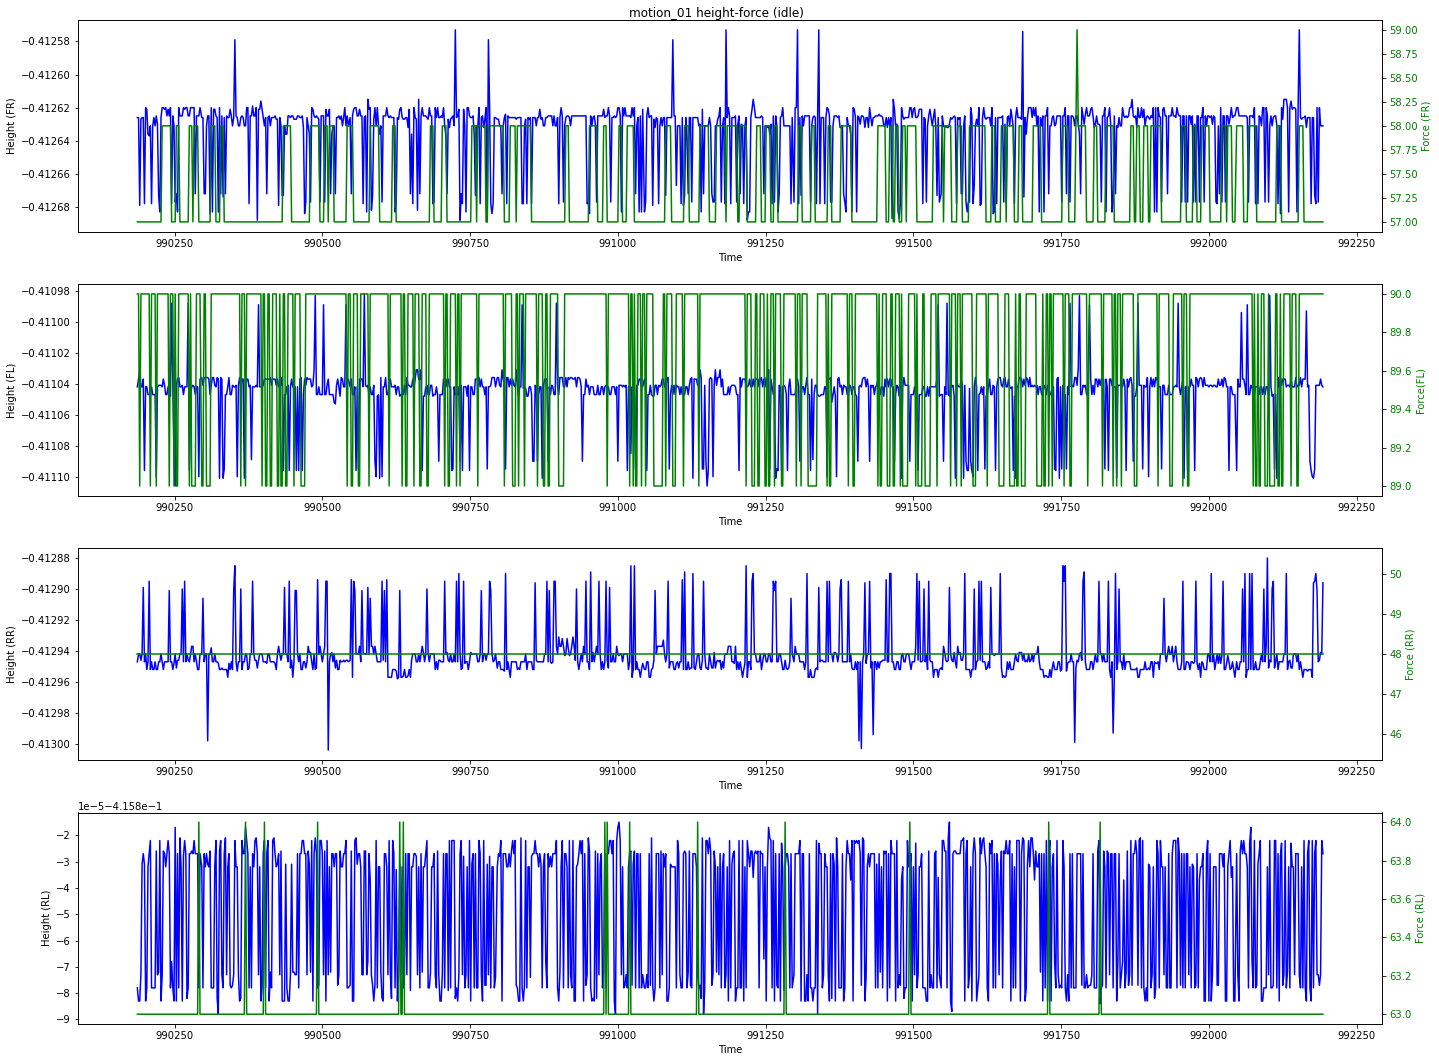

35901 35615 36849 36886


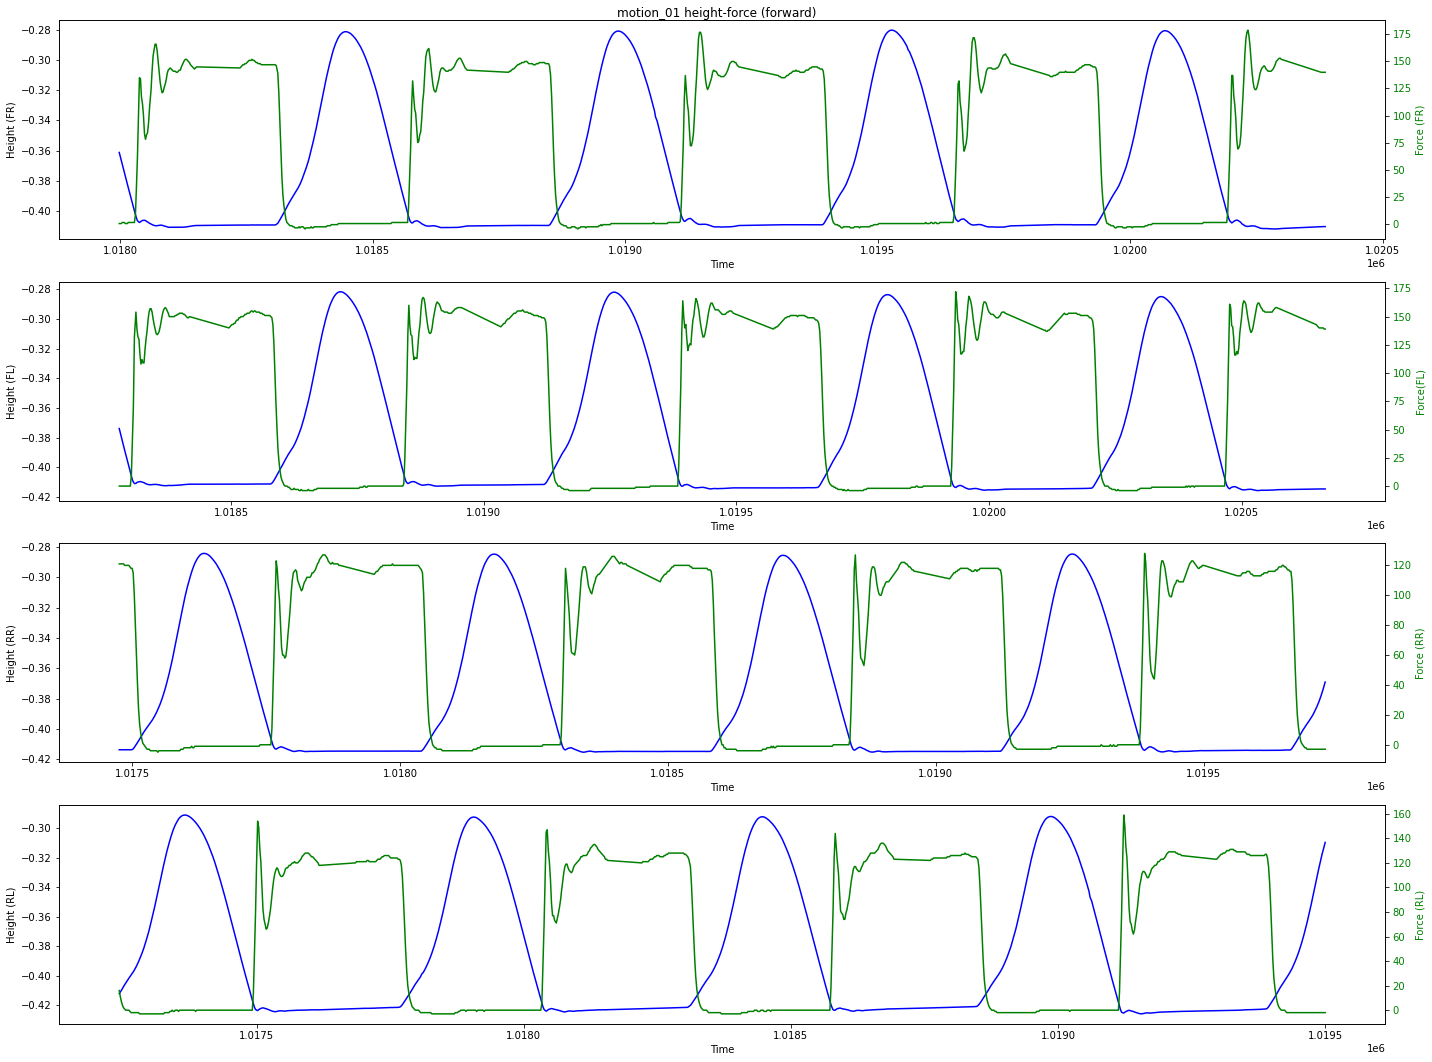

30183 29936 30472 30692


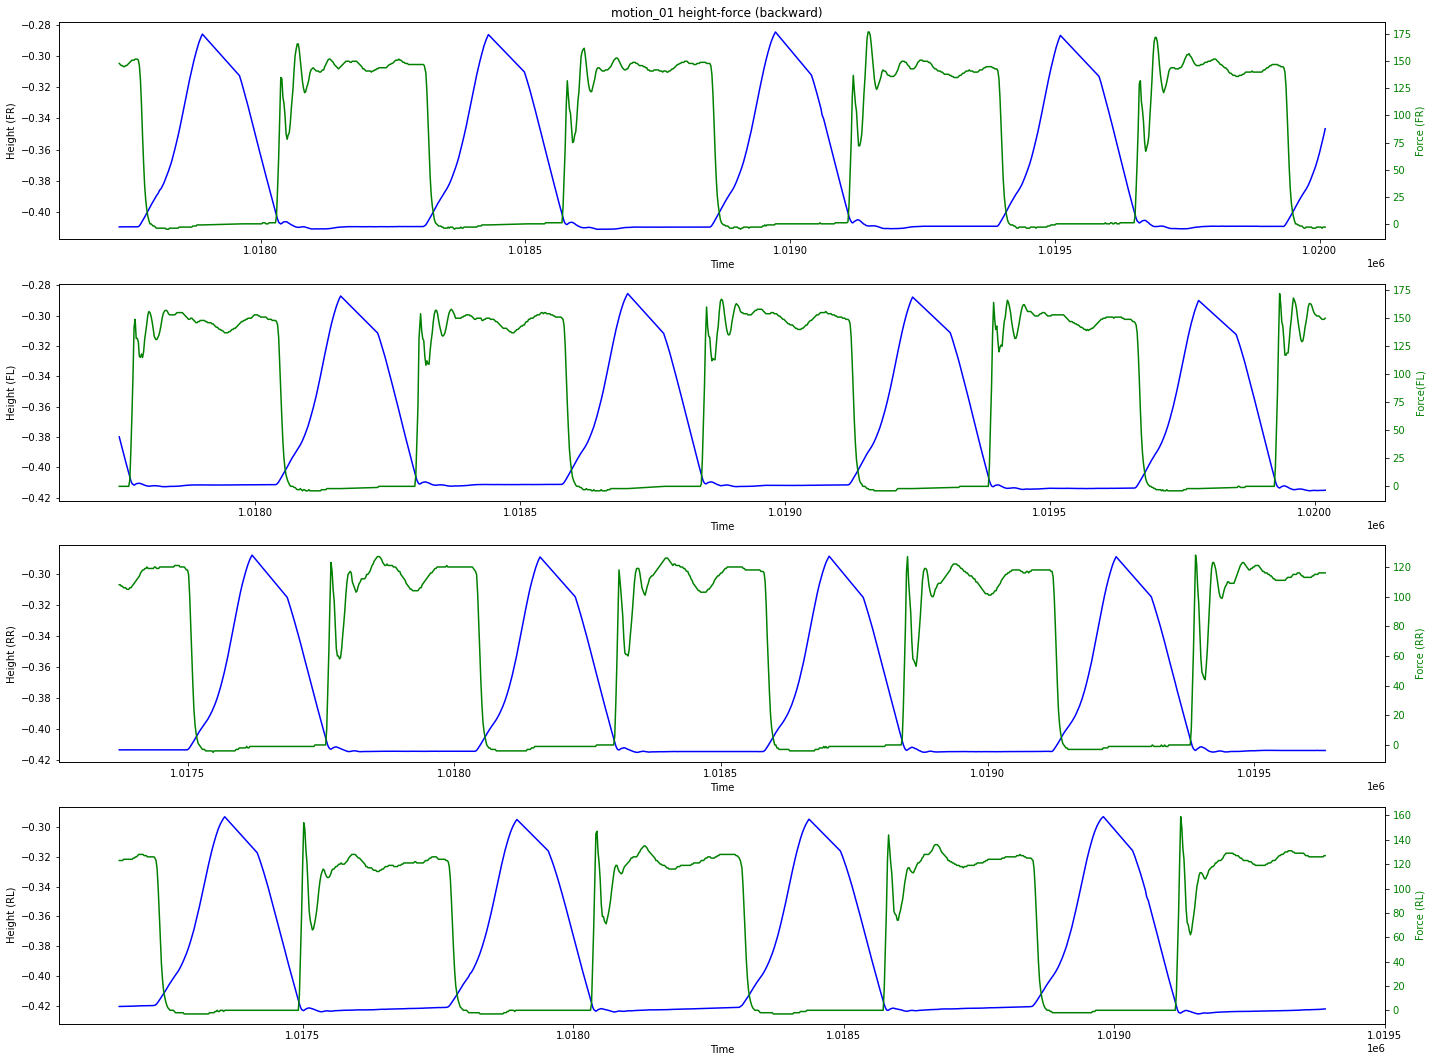

1235 1145 1200 1245


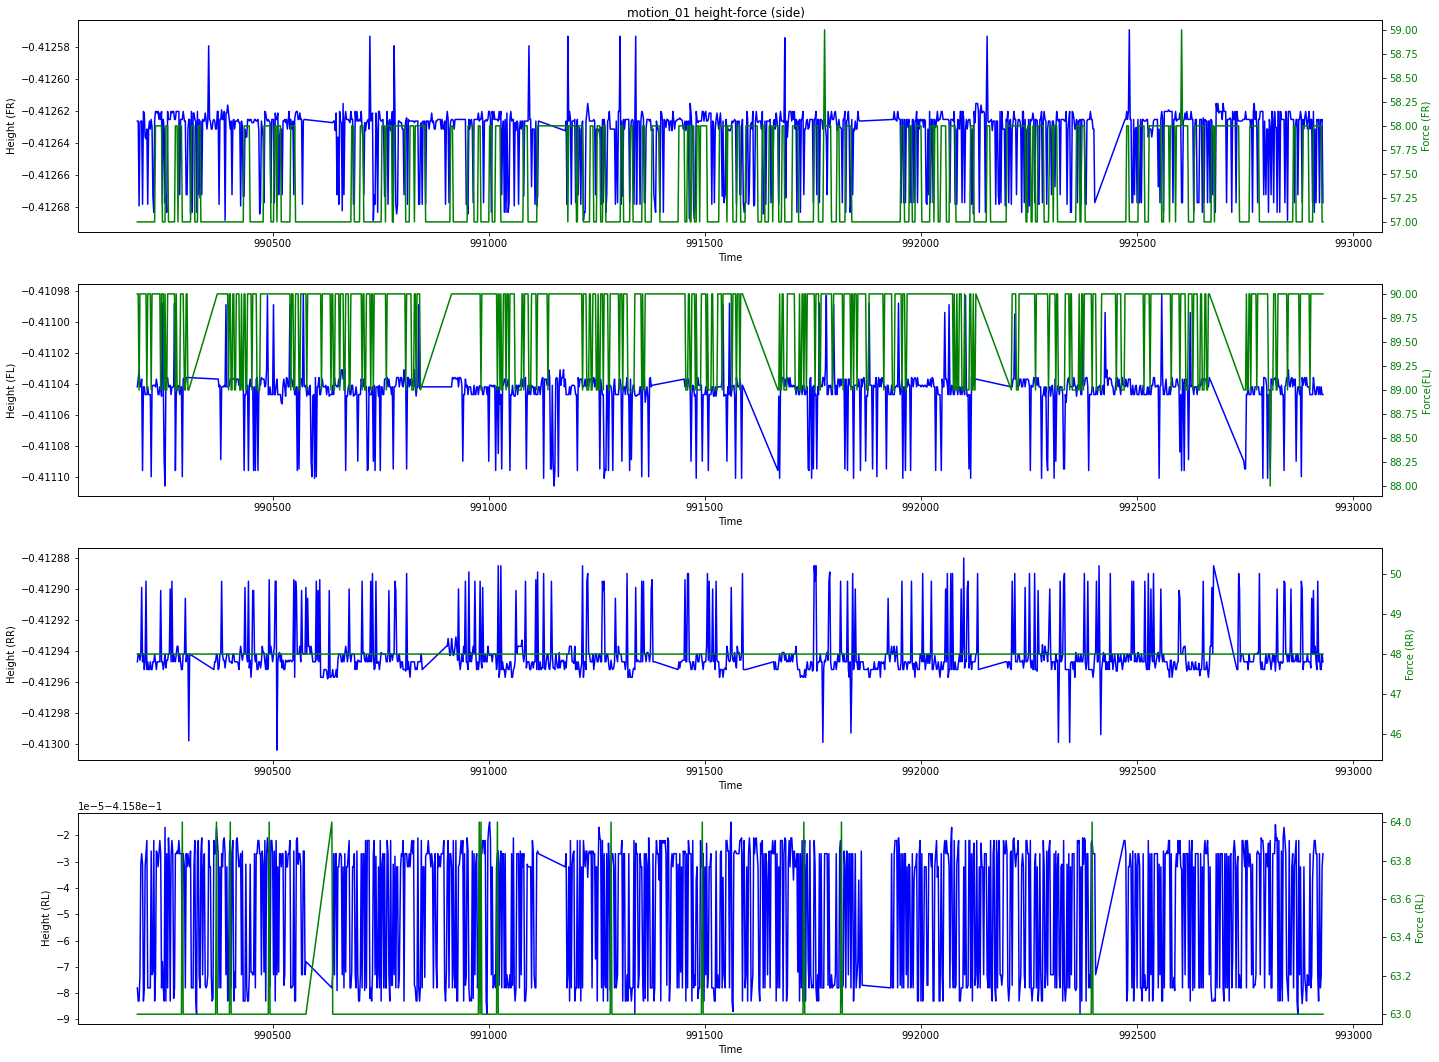

18859 18745 19023 19010


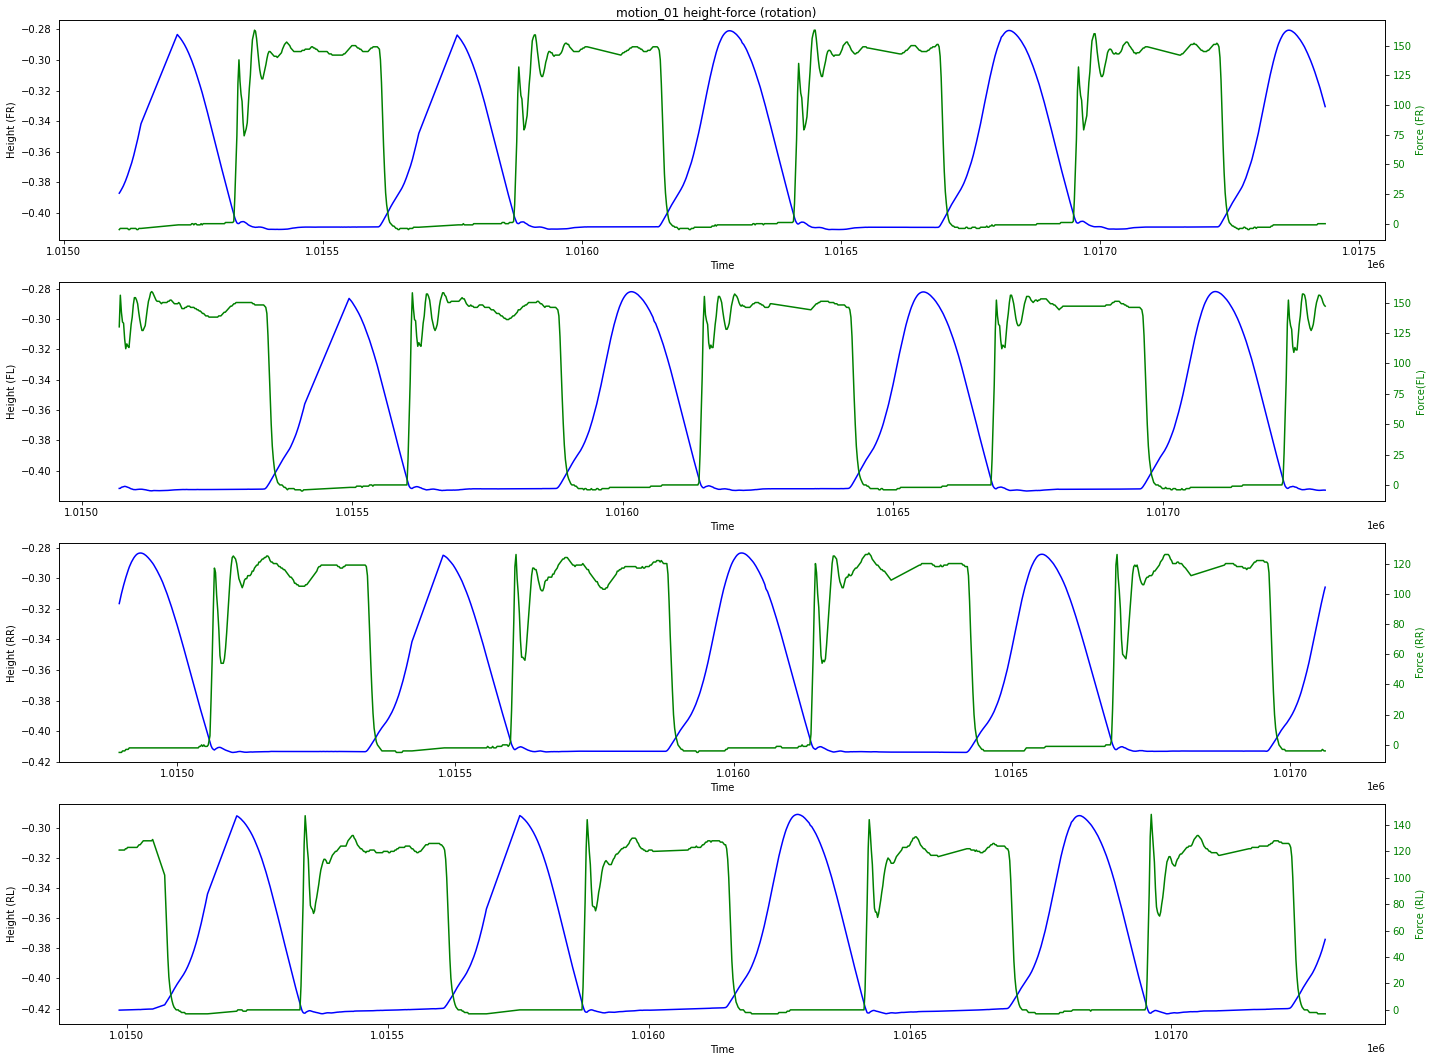

In [52]:
# Idle
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01)

sample_walking_fr_height = fr_min_height[:1000]
sample_walking_fl_height = fl_min_height[:1000]
sample_walking_rr_height = rr_min_height[:1000]
sample_walking_rl_height = rl_min_height[:1000]

plot_overlapping_data("motion_01 height-force (idle)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

# Forward
fwd_cmds = get_specific_cmd(motion_01, 0.1, 0, 0)
motion_01_fwd = motion_01[fwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01_fwd)

sample_walking_fr_height = fr_min_height[12000:13000]
sample_walking_fl_height = fl_min_height[12000:13000]
sample_walking_rr_height = rr_min_height[12000:13000]
sample_walking_rl_height = rl_min_height[12000:13000]

plot_overlapping_data("motion_01 height-force (forward)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

# Backwards
bwd_cmds = get_specific_cmd(motion_01, -0.1, 0, 0)
motion_01_bwd = motion_01[bwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01_bwd)

sample_walking_fr_height = fr_min_height[12000:13000]
sample_walking_fl_height = fl_min_height[12000:13000]
sample_walking_rr_height = rr_min_height[12000:13000]
sample_walking_rl_height = rl_min_height[12000:13000]

plot_overlapping_data("motion_01 height-force (backward)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

# Side
side_cmds = get_specific_cmd(motion_01, 0, 0.1, 0)
motion_01_side = motion_01[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01_side)

sample_walking_fr_height = fr_min_height[:6700]
sample_walking_fl_height = fl_min_height[:6700]
sample_walking_rr_height = rr_min_height[:6700]
sample_walking_rl_height = rl_min_height[:6700]

plot_overlapping_data("motion_01 height-force (side)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

# Rotation
rot_cmds = get_specific_cmd(motion_01, 0, 0, 0.1)
motion_01_rot = motion_01[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_01_rot)

sample_walking_fr_height = fr_min_height[12000:13000]
sample_walking_fl_height = fl_min_height[12000:13000]
sample_walking_rr_height = rr_min_height[12000:13000]
sample_walking_rl_height = rl_min_height[12000:13000]

plot_overlapping_data("motion_01 height-force (rotation)",
                      motion_01,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

## Motion_04

In [55]:
motion_04[:, 2:5]

array([[ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0. 

62705 62211 63724 64350


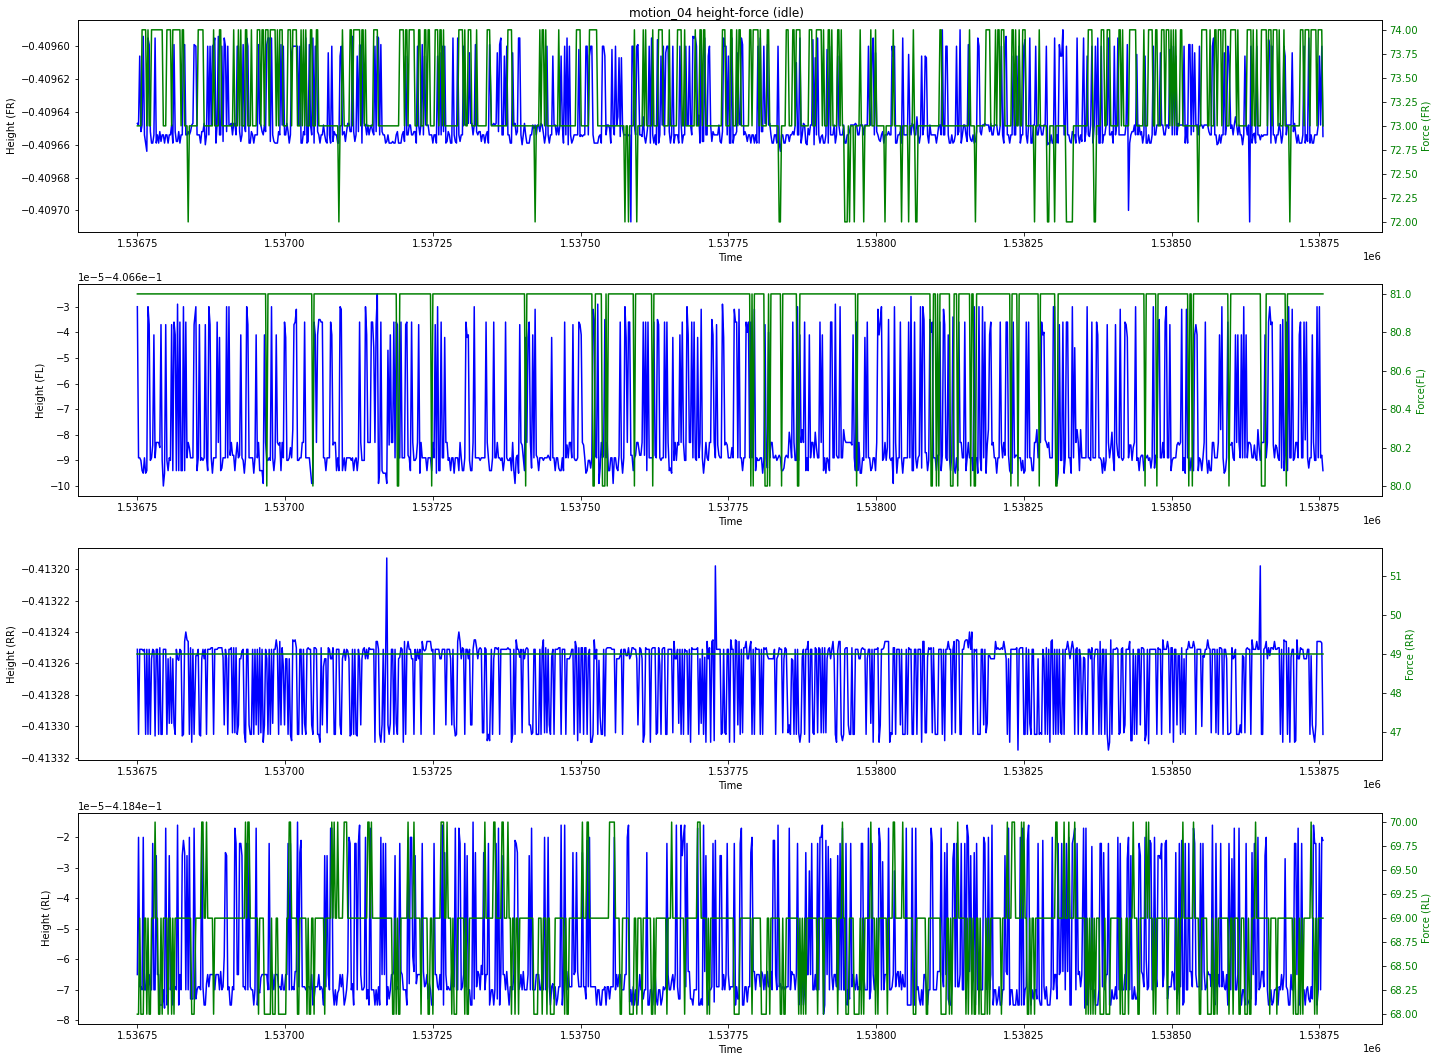

19475 19269 20165 20460


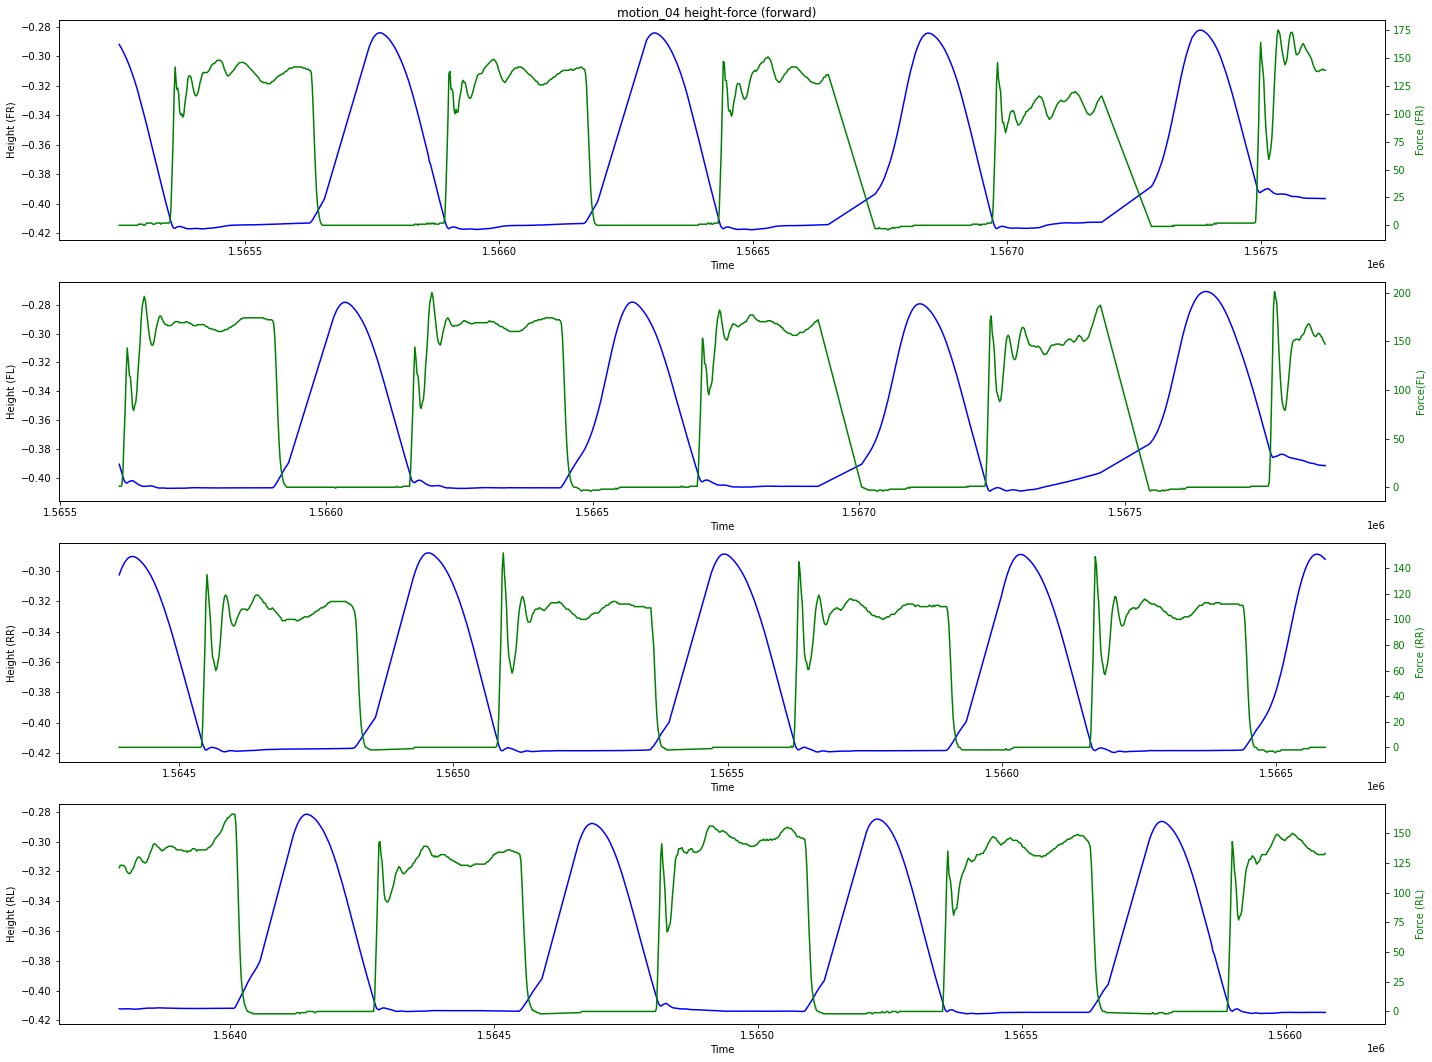

8829 8696 8749 8726


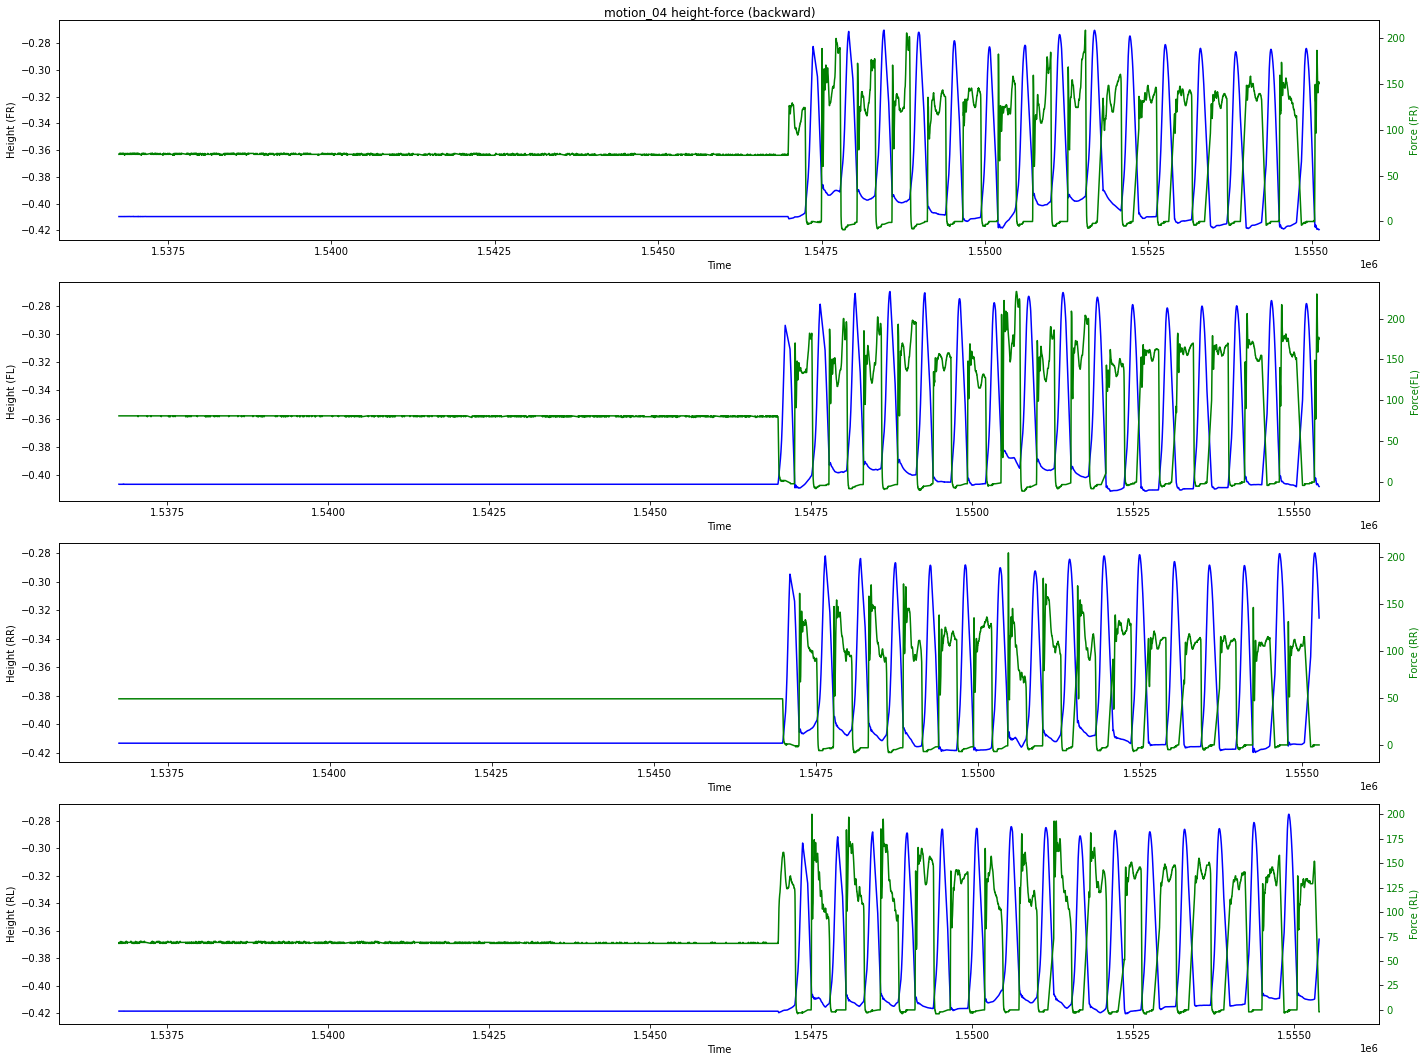

415 453 472 439


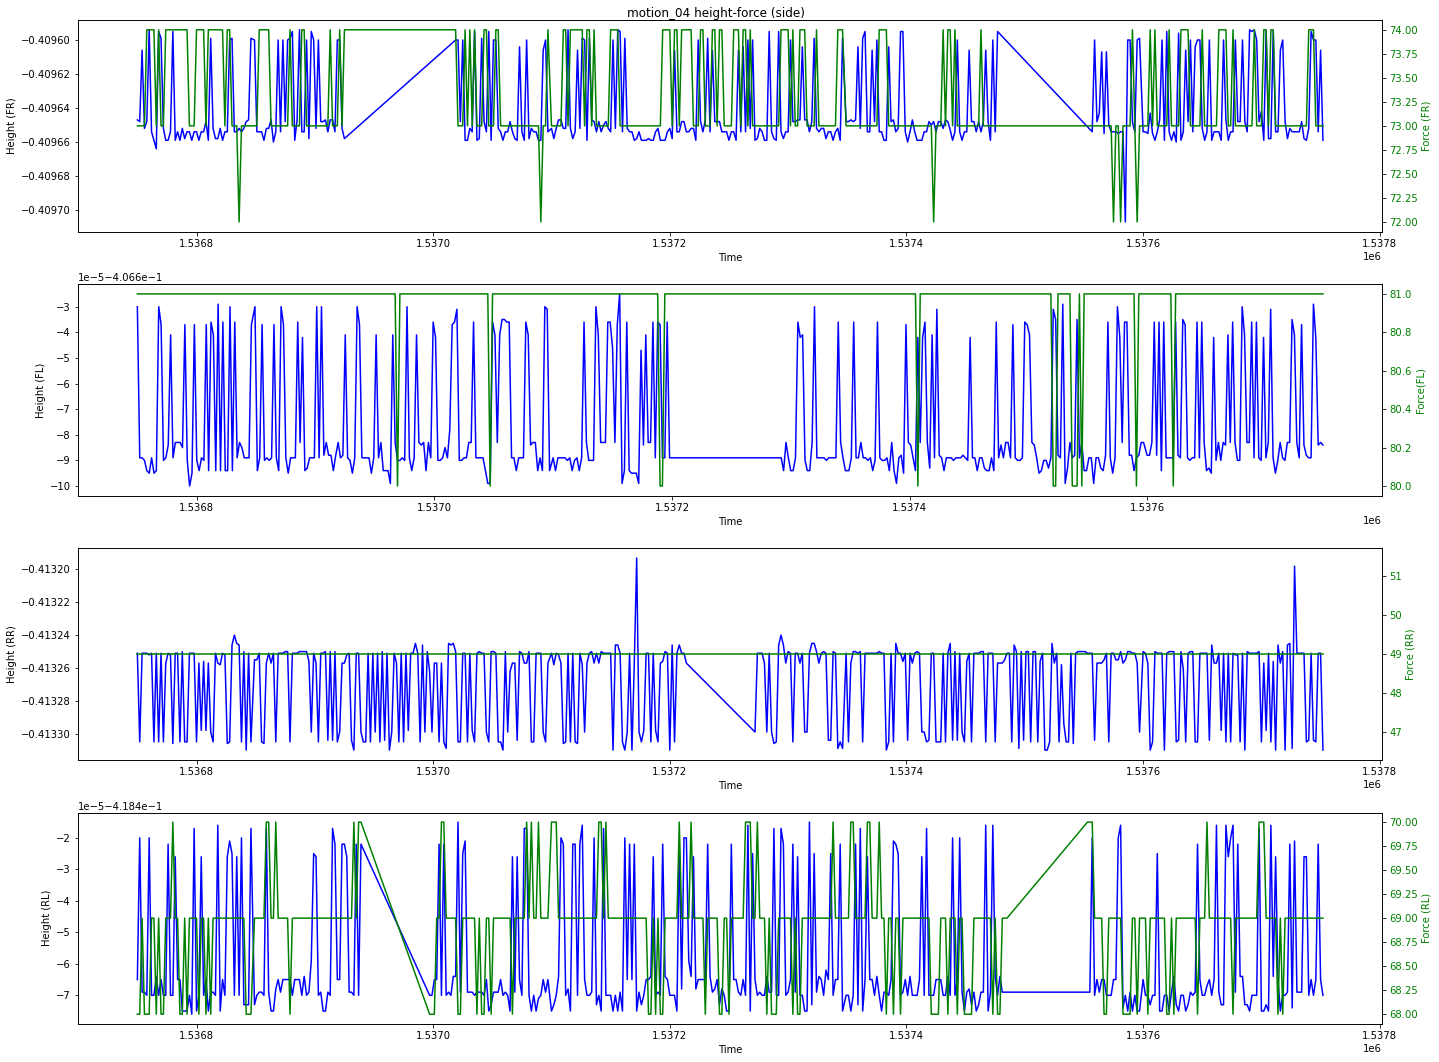

27254 27015 27521 27799


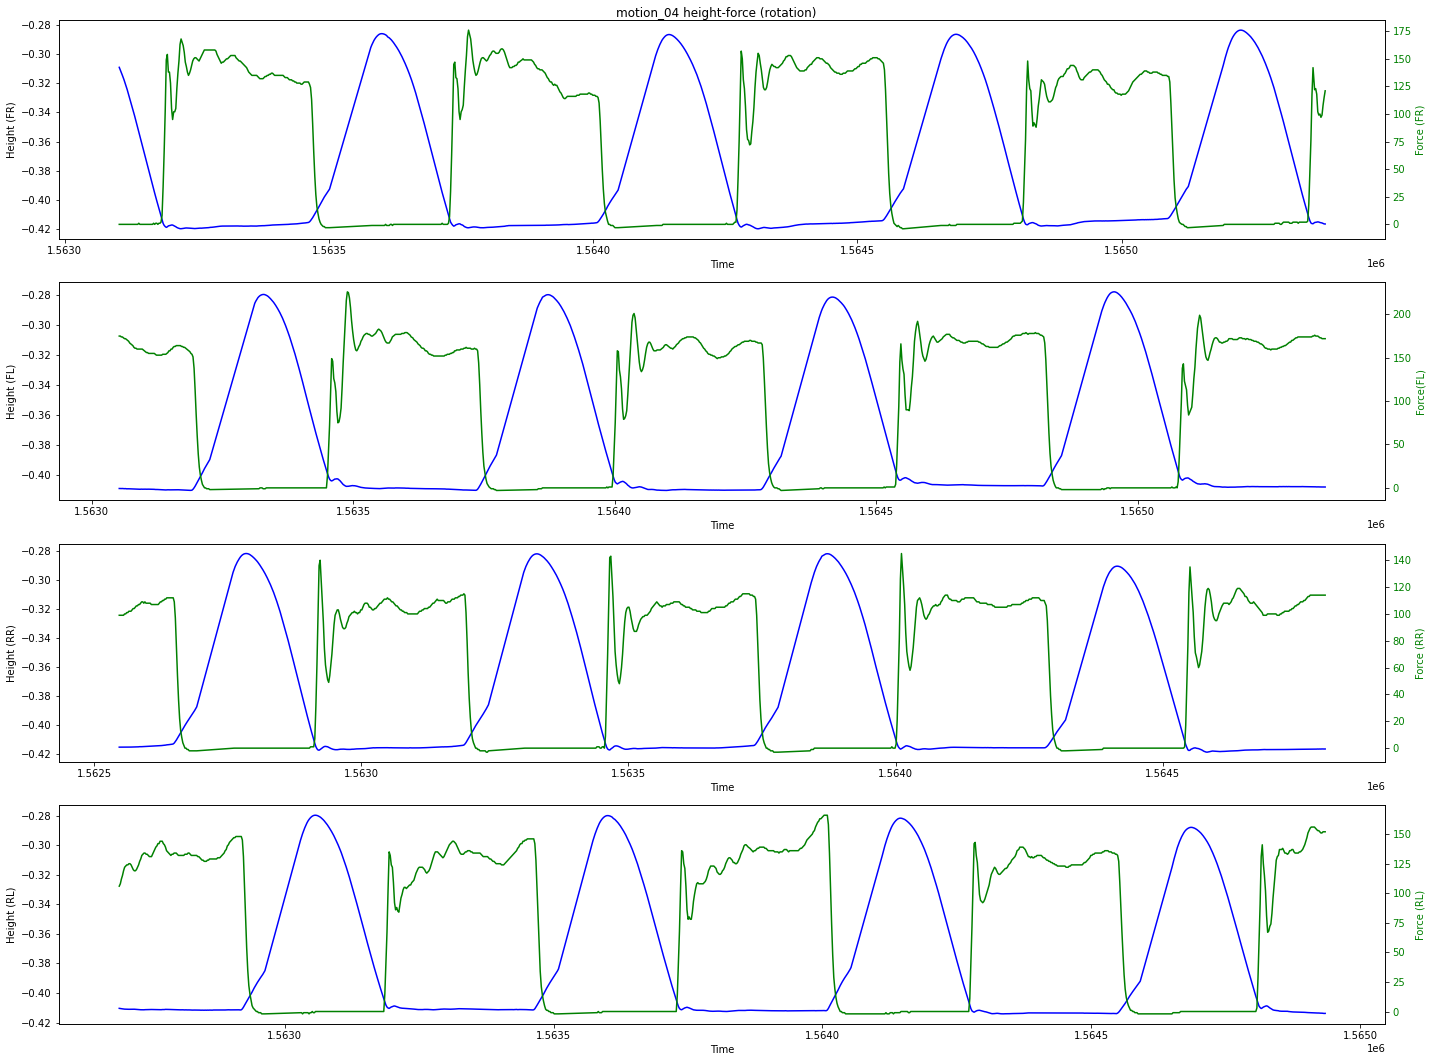

In [57]:
# Idle
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_04)

sample_walking_fr_height = fr_min_height[:1000]
sample_walking_fl_height = fl_min_height[:1000]
sample_walking_rr_height = rr_min_height[:1000]
sample_walking_rl_height = rl_min_height[:1000]

plot_overlapping_data("motion_04 height-force (idle)",
                      motion_04,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

# Forward
fwd_cmds = get_specific_cmd(motion_04, 0.417725, 0, 0)
motion_04_fwd = motion_04[fwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_04_fwd)

sample_walking_fr_height = fr_min_height[12000:13000]
sample_walking_fl_height = fl_min_height[12000:13000]
sample_walking_rr_height = rr_min_height[12000:13000]
sample_walking_rl_height = rl_min_height[12000:13000]

plot_overlapping_data("motion_04 height-force (forward)",
                      motion_04,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

# Backwards
bwd_cmds = get_specific_cmd(motion_04, -0.417725, 0, 0)
motion_04_bwd = motion_04[bwd_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_04_bwd)

sample_walking_fr_height = fr_min_height[:8000]
sample_walking_fl_height = fl_min_height[:8000]
sample_walking_rr_height = rr_min_height[:8000]
sample_walking_rl_height = rl_min_height[:8000]

plot_overlapping_data("motion_04 height-force (backward)",
                      motion_04,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

# Side
side_cmds = get_specific_cmd(motion_04, 0, 0.417725, 0)
motion_04_side = motion_04[side_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_04_side)

sample_walking_fr_height = fr_min_height[:6700]
sample_walking_fl_height = fl_min_height[:6700]
sample_walking_rr_height = rr_min_height[:6700]
sample_walking_rl_height = rl_min_height[:6700]

plot_overlapping_data("motion_04 height-force (side)",
                      motion_04,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

# Rotation
rot_cmds = get_specific_cmd(motion_04, 0, 0, 0.417725)
motion_04_rot = motion_04[rot_cmds]
fr_min_height,fl_min_height,rr_min_height,rl_min_height = get_swinging_motions(motion_04_rot)

sample_walking_fr_height = fr_min_height[12000:13000]
sample_walking_fl_height = fl_min_height[12000:13000]
sample_walking_rr_height = rr_min_height[12000:13000]
sample_walking_rl_height = rl_min_height[12000:13000]

plot_overlapping_data("motion_04 height-force (rotation)",
                      motion_04,
                      [sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59])

## Footsteps Extraction (Height + Force)

In [36]:
def extract_footsteps(dataset, height_threshold=0.2, force_thresholds=[100,100,100,100]):
    # Compute height difference for FR and FL
    fr_fl_diff = np.round(abs(dataset[:, 34] - dataset[:, 37]), 9)
    print("Min and max diff between FR and FL:", min(fr_fl_diff), max(fr_fl_diff), "\n")

    # Compute height difference for RR and RL
    rr_rl_diff = np.round(abs(dataset[:, 40] - dataset[:, 43]), 9)
    print("Min and max diff between RR and RL:", min(rr_rl_diff), max(rr_rl_diff), "\n")

    # Compute compound difference for all foots
    height_diff = np.round(fr_fl_diff + rr_rl_diff, 9)
    print("Min and max diff between right and left feet", min(height_diff), max(height_diff), "\n")
    
    # Find footsteps (based on height difference)
    footsteps_height = np.where(height_diff < height_threshold)[0]
    print("Amount of footsteps found with height criteria: ", len(footsteps_height), "\n")
    
    # Footsteps that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(D[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with motion commands: ", footsteps_due_to_motion, "\n")
    
    # Footsteps that belong to idle mode
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(D[:, 2:5], axis=1))[0], footsteps_height))
    print("Intersection with no motion commands: ", footsteps_due_to_stationarity, "\n")
    
    # FR min height (i.e swining motion)
    rear_force_footsteps = np.where(np.logical_and(D[:, 58] > force_thresholds[0], 
                                                   D[:, 59] > force_thresholds[1]))[0]
    front_force_footsteps = np.where(np.logical_and(D[:, 56] > force_thresholds[2], 
                                                    D[:, 57] > force_thresholds[3]))[0]

    # Find footsteps that match force constraints on all foot
    footsteps_force = np.intersect1d(rear_force_footsteps, front_force_footsteps)
    print("Number of force footsteps: ", len(footsteps_force), "\n")
    
    # Find force and height footsteps intersection
    force_height_footsteps = np.intersect1d(footsteps_force, footsteps_height)
    print("Number of height-force footsteps: ", len(force_height_footsteps), "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_motion = len(np.intersect1d(np.where(np.any(D[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to motion: ", footsteps_due_to_motion, "\n")
    
    # Footsteps (from force and height) that belong to motion commands
    footsteps_due_to_stationarity = len(np.intersect1d(np.where(~np.any(D[:, 2:5], axis=1))[0], force_height_footsteps))
    print("Number of footsteps extracted with height-force due to no motion: ", footsteps_due_to_stationarity, "\n")
    
    return force_height_footsteps

def footsteps_nms(footsteps):
    footsteps_nms = []

    footsteps_sort, timestamps_sort = zip(*sorted(zip(footsteps, D[footsteps, 0])))

    for idx, footstep_sort in enumerate(footsteps_sort):
        if idx > 0:
            if abs(D[footstep_sort, 0] - D[footsteps_sort[idx-1], 0]) < 9:
                continue
            else:
                footsteps_nms.append(footstep_sort)
        else:
            footsteps_nms.append(footstep_sort)

    return np.asarray(footsteps_nms)

### Footsteps (motion_01)

In [52]:
forward_commands_only = np.where(np.logical_and(motion_01[:, 2] == 0.1, 
                                                motion_01[:, 3] == 0, 
                                                motion_01[:, 4] == 0))[0]

In [55]:
motion_01_fwd = motion_01[forward_commands_only]

In [59]:
footsteps_01 = extract_footsteps(motion_01_fwd)
len(footsteps_01)

Min and max diff between FR and FL: 1e-06 0.138272 

Min and max diff between RR and RL: 2e-06 0.13306 

Min and max diff between right and left feet 6.8e-05 0.266234 

Amount of footsteps found with height criteria:  27875 

Intersection with motion commands:  27875 

Intersection with no motion commands:  0 

Number of force footsteps:  737 

Number of height-force footsteps:  737 

Number of footsteps extracted with height-force due to motion:  737 

Number of footsteps extracted with height-force due to no motion:  0 



737

In [57]:
footsteps_nms_01 = footsteps_nms(footsteps_01)
len(footsteps_nms_01)

310

In [39]:
sample_walking_fr_height = fr_min_height[:500]
sample_walking_fl_height = fl_min_height[:500]
sample_walking_rr_height = rr_min_height[:500]
sample_walking_rl_height = rl_min_height[:500]

plot_overlapping_data([sample_walking_fr_height, 
                       sample_walking_fl_height, 
                       sample_walking_rr_height,
                       sample_walking_rl_height],
                       [34, 56, 37, 57, 40, 58, 43, 59],
                       True,
                       D[footsteps_nms(footsteps), 0])

NameError: name 'fr_min_height' is not defined

### Footstep visualization

In [170]:
def visualize_static_foosteps(footsteps):
    # Visualize footsteps
    for footstep in footsteps:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')

        #ax.set_xlim([-0.5, 0.5])
        #ax.set_ylim([-0.3, 0.3])
        ax.set_zlim([-0.5, 0.5])

        D[footstep, 32:44] = np.round(D[footstep, 32:44], 3)

        # 3D positions
        xs = np.array([D[footstep, 32], D[footstep, 35], D[footstep, 38], D[footstep, 41]])
        ys = np.array([D[footstep, 33], D[footstep, 36], D[footstep, 39], D[footstep, 42]])
        zs = np.array([D[footstep, 34], D[footstep, 37], D[footstep, 40], D[footstep, 43]])

        print(xs, ys, zs, D[footstep, 2:5], D[footstep, 25:28])

        ax.scatter(xs, ys, zs, marker='o')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')

        plt.show()

In [171]:
def update_points(num, x, y, z, points):    
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    D[footstep, 32:44] = np.round(D[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([D[footstep, 32], D[footstep, 35], D[footstep, 38], D[footstep, 41]])
    new_y = np.array([D[footstep, 33], D[footstep, 36], D[footstep, 39], D[footstep, 42]])
    new_z = np.array([D[footstep, 34], D[footstep, 37], D[footstep, 40], D[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_animated_footsteps(footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    D[footstep, 32:44] = np.round(D[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([D[footstep, 32], D[footstep, 35], D[footstep, 38], D[footstep, 41]])
    y = np.array([D[footstep, 33], D[footstep, 36], D[footstep, 39], D[footstep, 42]])
    z = np.array([D[footstep, 34], D[footstep, 37], D[footstep, 40], D[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(x, y, z, points))
    
    return anim   

In [172]:
def update_prediction_points(num, x, y, z, points):    
    # Starting footstep index
    footstep = footsteps[num]
    
    # Round footsteps position
    D[footstep, 32:44] = np.round(D[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    new_x = np.array([D[footstep, 32], D[footstep, 35], D[footstep, 38], D[footstep, 41]])
    new_y = np.array([D[footstep, 33], D[footstep, 36], D[footstep, 39], D[footstep, 42]])
    new_z = np.array([D[footstep, 34], D[footstep, 37], D[footstep, 40], D[footstep, 43]])

    # update properties
    points.set_data(new_x, new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points

def visualize_predicted_animated_footsteps(footsteps, style: str):
    # Create figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Setting the axes properties
    ax.set_xlim3d([-0.4, 0.4])
    ax.set_xlabel('X')

    ax.set_ylim3d([-0.2, 0.2])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-0.5, 0.5])
    ax.set_zlabel('Z')

    # Starting footstep index
    footstep = footsteps[0]

    # Round footsteps position
    D[footstep, 32:44] = np.round(D[footstep, 32:44], 3)

    # Initial footsteps 3D positions
    x = np.array([D[footstep, 32], D[footstep, 35], D[footstep, 38], D[footstep, 41]])
    y = np.array([D[footstep, 33], D[footstep, 36], D[footstep, 39], D[footstep, 42]])
    z = np.array([D[footstep, 34], D[footstep, 37], D[footstep, 40], D[footstep, 43]])

    txt = fig.suptitle('')
    points, = ax.plot(x, y, z, style)
    
    # blit=True re-draws only the parts that have changed.
    anim = animation.FuncAnimation(fig, update_points, frames=len(footsteps), fargs=(x, y, z, points))
    
    return anim   

# Multivariate Linear Regression (FR foot prediction)

The input will use initially only:

- **HighCmd: fwd, side, rot speeds**
- **HighState: fwd, side, rot speeds, footPosition2Body (FR)**

and as output we seek to predict the following:

- **footPosition2Body (FR)**

In [173]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

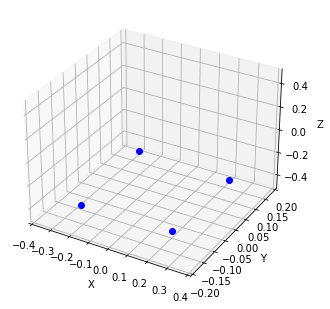

In [366]:
anim = visualize_animated_footsteps(footsteps_nms, "bo")
HTML(anim.to_html5_video()) 

## Predict FR foot (x,y,z)

In [367]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((D[footsteps, 2:5], D[footsteps, 25:28], D[footsteps, 32:35], D[footsteps, 35:38]))[:-1, :]
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = D[footsteps, 32:35][1:]
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Create the model
model_fr_full = LinearRegression()

# Fit the model
model_fr_full.fit(X_train, Y_train)

# Predict
predictions = model_fr_full.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# Compute MAE
print("The MSE between the prediction and groundtruth is: ", mse)

Input shape:  (736, 12)
Labels shape:  (736, 3)
Predictions shape:  (74, 3)
The MSE between the prediction and groundtruth is:  0.00037424114951006105


In [368]:
predictions

array([[ 0.23808876, -0.13641753, -0.41028195],
       [ 0.23287888, -0.14314866, -0.40440816],
       [ 0.24663644, -0.1257058 , -0.41075221],
       [ 0.22411843, -0.13760112, -0.40885836],
       [ 0.2250077 , -0.14303246, -0.40584794],
       [ 0.25706807, -0.13240431, -0.40831025],
       [ 0.24348657, -0.14129138, -0.40514363],
       [ 0.22869596, -0.13372463, -0.4087016 ],
       [ 0.23468456, -0.13540966, -0.40847707],
       [ 0.24193015, -0.13553012, -0.41078759],
       [ 0.2180806 , -0.13269785, -0.41099643],
       [ 0.24452184, -0.12402607, -0.41078985],
       [ 0.22647519, -0.13671156, -0.4081292 ],
       [ 0.23104905, -0.13599038, -0.40955167],
       [ 0.22332202, -0.14183797, -0.40622858],
       [ 0.24096019, -0.13493209, -0.40707665],
       [ 0.25079961, -0.13648251, -0.40631127],
       [ 0.23158557, -0.13728542, -0.40830281],
       [ 0.23743043, -0.13612143, -0.40742025],
       [ 0.2227247 , -0.1377121 , -0.40883606],
       [ 0.23378009, -0.12978641, -0.409

### Predict FR foot -> x

In [417]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((D[footsteps, 25:28], np.array([D[footsteps, 32]]).T, np.array([D[footsteps, 35]]).T))[:-1, :]
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([D[footsteps, 32]]).T[1:]
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Create the model
model_fr_x = LinearRegression()

# Fit the model
model_fr_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_x.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# Compute MAE
print("The mean avg. error between the prediction and groundtruth is: ", mse)

Input shape:  (496, 5)
Labels shape:  (496, 1)
Predictions shape:  (50, 1)
The mean avg. error between the prediction and groundtruth is:  0.0002438095265011372


### Predict FR foot -> y

In [418]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((D[footsteps, 25:28], np.array([D[footsteps, 33]]).T, np.array([D[footsteps, 36]]).T))[:-1, :]
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([D[footsteps, 33]]).T[1:]
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Create the model
model_fr_y = LinearRegression()

# Fit the model
model_fr_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_y.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# Compute MAE
print("The mean avg. error between the prediction and groundtruth is: ", mse)

Input shape:  (496, 5)
Labels shape:  (496, 1)
Predictions shape:  (50, 1)
The mean avg. error between the prediction and groundtruth is:  1.961319883283269e-05


### Predict FR foot -> z

In [419]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((D[footsteps, 25:28], np.array([D[footsteps, 34]]).T, np.array([D[footsteps, 37]]).T))[:-1, :]
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([D[footsteps, 34]]).T[1:]
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Create the model
model_fr_z = LinearRegression()

# Fit the model
model_fr_z.fit(X_train, Y_train)

# Predict
predictions = model_fr_z.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# Compute ME
print("The mean avg. error between the prediction and groundtruth is: ", mse)

Input shape:  (496, 5)
Labels shape:  (496, 1)
Predictions shape:  (50, 1)
The mean avg. error between the prediction and groundtruth is:  2.289832228386816e-06
